<a href="https://colab.research.google.com/github/skardec/deeply_kardec/blob/main/IRIS_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Iris classification with a Bayesian model (GaussianNB)
# Run in Google Colab or any Python environment with scikit-learn and matplotlib

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [7]:
# Settings for nicer plots
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

# 1) Load Iris dataset
iris = datasets.load_iris()
X = iris.data              # shape (150, 4)
y = iris.target            # 0=setosa, 1=versicolor, 2=virginica
feature_names = iris.feature_names
class_names = iris.target_names

In [8]:
print("Features:", feature_names)
print("Classes:", class_names)
print("Dataset shape:", X.shape)


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Dataset shape: (150, 4)


In [9]:
# 2) Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [10]:
# 3) Standardize features (fit on train, apply to both)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


In [11]:
# 4) Train Gaussian Naive Bayes (modelo bayesiano simples)
clf = GaussianNB()
clf.fit(X_train_s, y_train)

GaussianNB()

In [12]:
# 5) Predictions and metrics
y_pred = clf.predict(X_test_s)
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy (test): {acc:.4f}\n")
print("Classification report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy (test): 0.9111

Classification report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



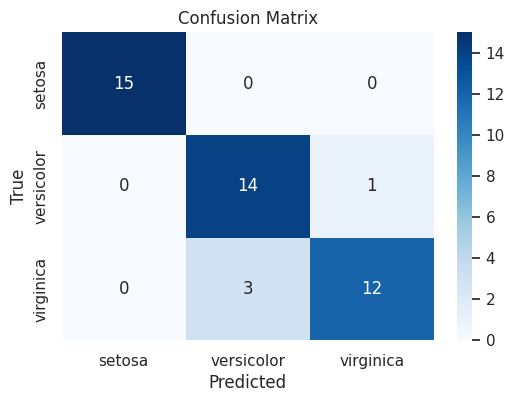

In [13]:

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

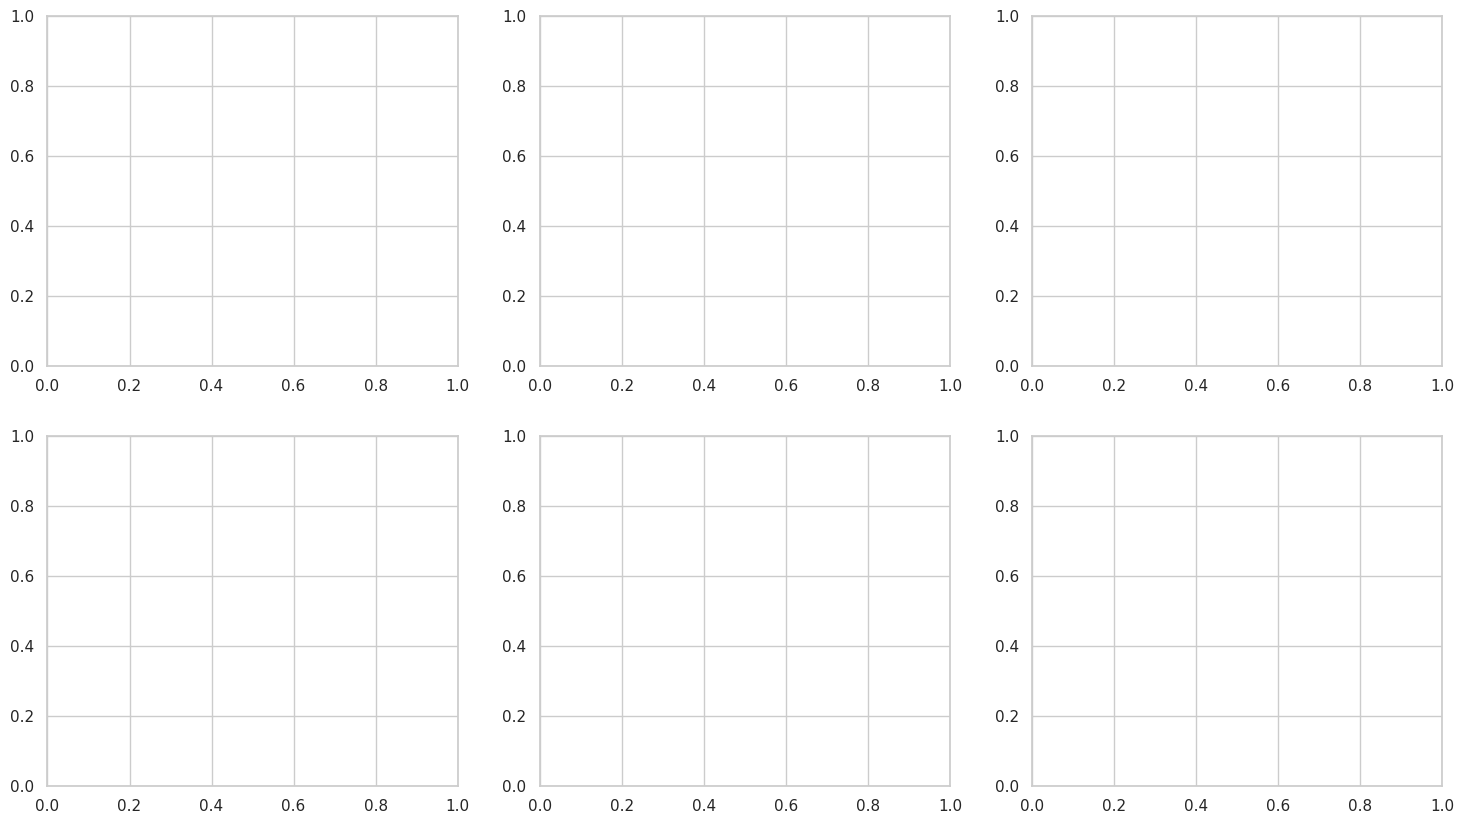

In [14]:
# 6) Pairwise 2D plots (all 6 combinations)
# We'll plot decision regions for each pair. For each pair, we:
# - train a GaussianNB on only those two standardized features (from the training set)
# - build a meshgrid, predict class on grid, plot region + scatter of test points colored by true class
pairs = []
n_features = X.shape[1]
for i in range(n_features):
    for j in range(i+1, n_features):
        pairs.append((i, j))

# Colors and colormap
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # blue, orange, green
cmap_light = ListedColormap([c + '80' for c in colors])  # translucent regions if hex supports alpha; fallback below
# Safe fallback: create lighter colors using matplotlib
cmap_light = ListedColormap(['#cfe8ff', '#ffe6c2', '#dff2d7'])
cmap_bold = ListedColormap(colors)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

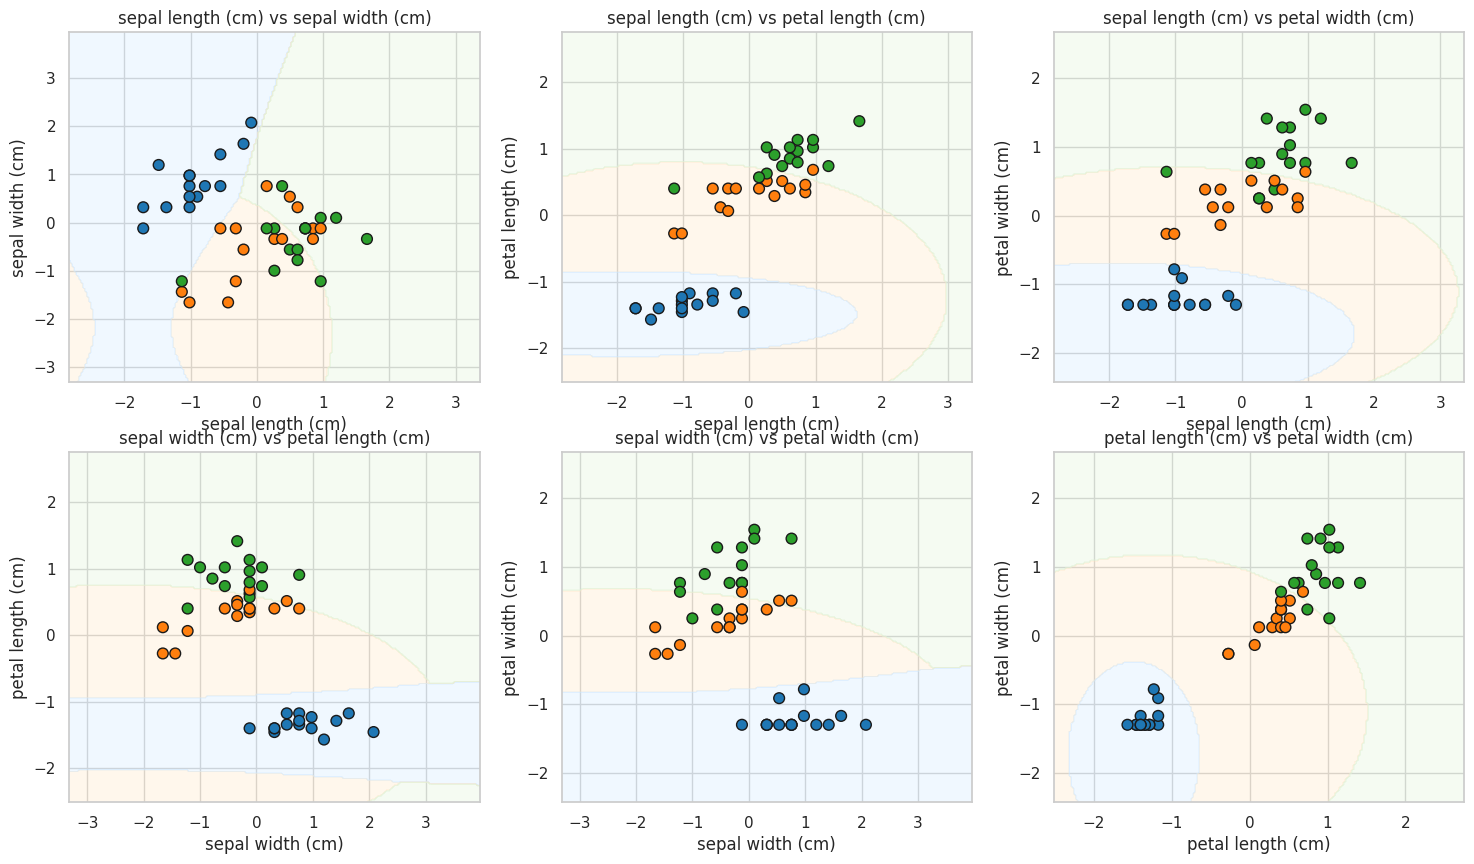

In [16]:
# 6) Pairwise 2D plots (all 6 combinations)
pairs = []
n_features = X.shape[1]
for i in range(n_features):
    for j in range(i+1, n_features):
        pairs.append((i, j))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # azul, laranja, verde
cmap_light = ListedColormap(['#cfe8ff', '#ffe6c2', '#dff2d7'])
cmap_bold = ListedColormap(colors)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, (i, j) in enumerate(pairs):
    ax = axes[idx]

    # Seleciona apenas 2 features
    X_train_pair = X_train_s[:, [i, j]]
    X_test_pair = X_test_s[:, [i, j]]

    # Treina classificador
    pair_clf = GaussianNB()
    pair_clf.fit(X_train_pair, y_train)

    # Define limites do gráfico
    x_min, x_max = X_train_pair[:, 0].min() - 1, X_train_pair[:, 0].max() + 1
    y_min, y_max = X_train_pair[:, 1].min() - 1, X_train_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predição no grid
    Z = pair_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Desenha regiões de decisão
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    # Plota os pontos do conjunto de teste
    scatter = ax.scatter(X_test_pair[:, 0], X_test_pair[:, 1], c=y_test,
                         cmap=cmap_bold, edgecolor='k', s=60)

    ax.set_xlabel(feature_names[i])
    ax.set_ylabel(feature_names[j])
    ax.set_title(f"{feature_names[i]} vs {feature_names[j]}")

fig.legend(handles=scatter.legend_elements()[0],
           labels=class_names,
           loc="upper right", bbox_to_anchor=(1.12, 0.9))
plt.suptitle("Iris - GaussianNB (pairwise decision regions)", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

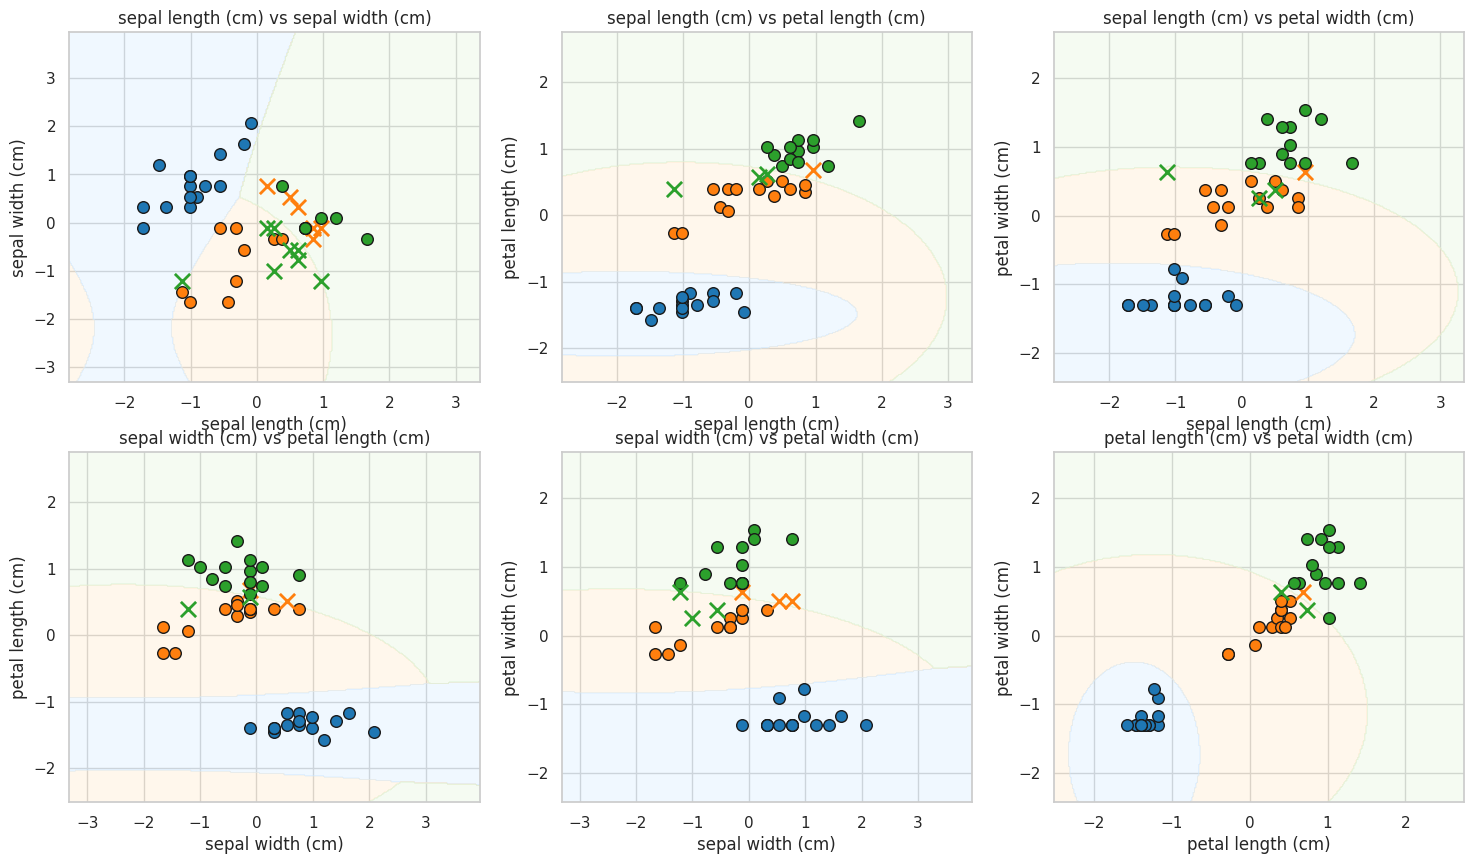

In [17]:
from matplotlib.lines import Line2D

# 6) Pairwise 2D plots (all 6 combinations) - versão corrigida com legenda segura
pairs = []
n_features = X.shape[1]
for i in range(n_features):
    for j in range(i+1, n_features):
        pairs.append((i, j))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # azul, laranja, verde
cmap_light = ListedColormap(['#cfe8ff', '#ffe6c2', '#dff2d7'])
cmap_bold = ListedColormap(colors)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, (i, j) in enumerate(pairs):
    ax = axes[idx]

    # Seleciona apenas 2 features (já padronizadas)
    X_train_pair = X_train_s[:, [i, j]]
    X_test_pair  = X_test_s[:, [i, j]]

    # Treina classificador só com essas 2 features
    pair_clf = GaussianNB()
    pair_clf.fit(X_train_pair, y_train)

    # Grid para região de decisão (mesma escala dos dados padronizados)
    x_min, x_max = X_train_pair[:, 0].min() - 1.0, X_train_pair[:, 0].max() + 1.0
    y_min, y_max = X_train_pair[:, 1].min() - 1.0, X_train_pair[:, 1].max() + 1.0
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    Z = pair_clf.predict(grid).reshape(xx.shape)

    # Região de decisão
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    # Previsões do classificador treinado no par (usadas para identificar erros)
    pair_pred = pair_clf.predict(X_test_pair)

    # Plota pontos do teste: corretos (bolinha) e incorretos (x)
    for class_idx, class_label in enumerate(class_names):
        mask = (y_test == class_idx)
        mask_correct = mask & (pair_pred == class_idx)
        mask_incorrect = mask & (pair_pred != class_idx)

        # Pontos corretos
        if np.any(mask_correct):
            ax.scatter(X_test_pair[mask_correct, 0], X_test_pair[mask_correct, 1],
                       c=[colors[class_idx]], marker='o', edgecolor='k', s=70, label=None)
        # Pontos incorretos
        if np.any(mask_incorrect):
            ax.scatter(X_test_pair[mask_incorrect, 0], X_test_pair[mask_incorrect, 1],
                       c=[colors[class_idx]], marker='x', s=120, linewidths=2, label=None)

    ax.set_xlabel(feature_names[i])
    ax.set_ylabel(feature_names[j])
    ax.set_title(f"{feature_names[i]} vs {feature_names[j]}")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# Cria legendas manuais (seguras) usando Line2D
legend_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[k],
           markeredgecolor='k', markersize=10)
    for k in range(len(class_names))
]
fig.legend(handles=legend_handles, labels=class_names,
           loc='upper right', bbox_to_anchor=(1.12, 0.9))

plt.suptitle('Iris - GaussianNB decision regions (pairwise)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


In [18]:




for idx, (i, j) in enumerate(pairs):
    ax = axes[idx]
    # Prepare training/test data for these two features
    X_train_pair = X_train_s[:, [i, j]]
    X_test_pair = X_test_s[:, [i, j]]

    # Train a fresh classifier on the pair
    pair_clf = GaussianNB()
    pair_clf.fit(X_train_pair, y_train)

    # Create mesh grid
    x_min, x_max = X_train_pair[:, 0].min() - 1.0, X_train_pair[:, 0].max() + 1.0
    y_min, y_max = X_train_pair[:, 1].min() - 1.0, X_train_pair[:, 1].max() + 1.0
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict on grid
    Z = pair_clf.predict(grid)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    # Scatter plot of test points (colored by true class)
    for class_idx, class_label in enumerate(class_names):
        mask = (y_test == class_idx)
        # Plot correctly classified points and misclassified separately
        mask_correct = mask & (y_test == y_pred)
        mask_incorrect = mask & (y_test != y_pred)
        # Plot correct
        ax.scatter(X_test_pair[mask_correct, 0], X_test_pair[mask_correct, 1],
                   c=[colors[class_idx]], marker='o', edgecolor='k', s=70, label=f"{class_label} (ok)" if idx==0 else "")
        # Plot incorrect with 'x'
        ax.scatter(X_test_pair[mask_incorrect, 0], X_test_pair[mask_incorrect, 1],
                   c=[colors[class_idx]], marker='x', s=90, linewidths=2, label=f"{class_label} (err)" if idx==0 else "")

    ax.set_xlabel(feature_names[i])
    ax.set_ylabel(feature_names[j])
    ax.set_title(f"{feature_names[i]} vs {feature_names[j]}")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# Create a single legend for the figure (classes)
handles = []
for k, name in enumerate(class_names):
    handles.append(plt.Line2D([0], [0], marker='o', color='w',
                              markerfacecolor=colors[k], markeredgecolor='k', markersize=10, label=name))
fig.legend(handles=handles, loc='upper right', bbox_to_anchor=(0.98, 0.95))
plt.suptitle('Iris - GaussianNB decision regions and test samples (all 2-by-2 feature pairs)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()


<Figure size 640x480 with 0 Axes>